In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")



In [4]:

merged_data = pd.merge(transactions, customers, on="CustomerID", how="left")


merged_data = pd.merge(merged_data, products, on="ProductID", how="left")

print("Merged Data Shape:", merged_data.shape)

Merged Data Shape: (1000, 13)


In [6]:
# Check missing values
print("Missing Values Before Cleaning:")
print(merged_data.isnull().sum())


merged_data = merged_data.dropna(subset=["SignupDate", "TransactionDate"])


merged_data["SignupDate"] = pd.to_datetime(merged_data["SignupDate"])
merged_data["TransactionDate"] = pd.to_datetime(merged_data["TransactionDate"])
merged_data = merged_data[merged_data["TransactionDate"] >= merged_data["SignupDate"]]


merged_data = merged_data[(merged_data["TotalValue"] > 0) & (merged_data["Quantity"] > 0)]


merged_data = merged_data.drop_duplicates(subset=["TransactionID"])

print("\nMissing Values After Cleaning:")
print(merged_data.isnull().sum())

Missing Values Before Cleaning:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price_x            0
CustomerName       0
Region             0
SignupDate         0
ProductName        0
Category           0
Price_y            0
dtype: int64

Missing Values After Cleaning:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price_x            0
CustomerName       0
Region             0
SignupDate         0
ProductName        0
Category           0
Price_y            0
dtype: int64


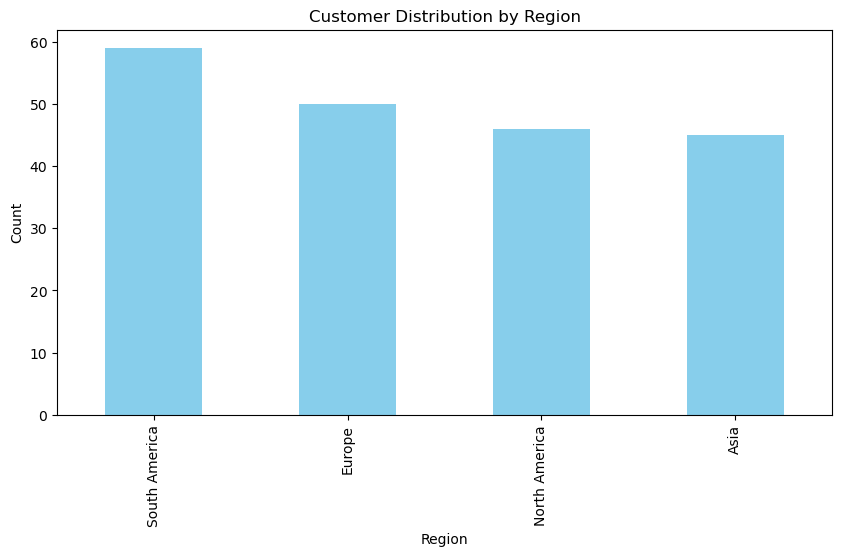

/var/folders/gm/p6n44d2n0j33qblb7jpkc69w0000gn/T/ipykernel_5425/1993757815.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  merged_data.set_index("TransactionDate").resample("M")["TotalValue"].sum().plot(figsize=(10, 5))


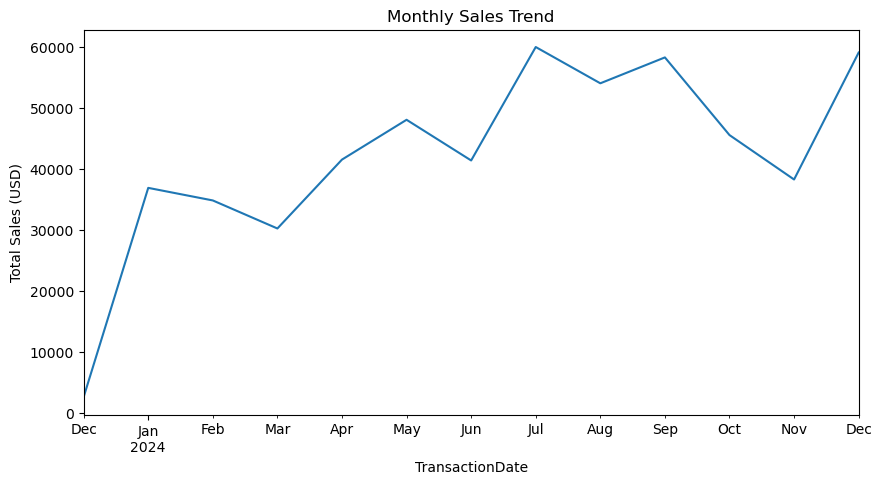

In [8]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 5))
customers["Region"].value_counts().plot(kind="bar", color="skyblue")
plt.title("Customer Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Count")
plt.savefig("region_distribution.png")  # Save plot
plt.show()


merged_data.set_index("TransactionDate").resample("M")["TotalValue"].sum().plot(figsize=(10, 5))
plt.title("Monthly Sales Trend")
plt.ylabel("Total Sales (USD)")
plt.savefig("monthly_sales.png")
plt.show()

In [10]:

asia_signups = customers[customers["Region"] == "Asia"].shape[0] / customers.shape[0]
asia_revenue = merged_data[merged_data["Region"] == "Asia"]["TotalValue"].sum() / merged_data["TotalValue"].sum()
print(f"Asia accounts for {asia_signups:.0%} of signups but {asia_revenue:.0%} of revenue.")

Asia accounts for 22% of signups but 22% of revenue.
